## Change Point Detection

Change point detection is used to find points in a timeseries where the underlying mechanism generating the data changes. 

The *seatbelt* dataset shows a change in the number of people who were killed or seariously injured on the road when wearing a seatbelt was made mandatory.

In [8]:
import datetime
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

import sktime

In [9]:
data_root = pathlib.Path(sktime.__file__).resolve().parent / "datasets" / "data"


def load_detection_dataset(relative_path, **kwargs):
    return pd.read_csv(data_root / relative_path, **kwargs)


df = load_detection_dataset("seatbelts/seatbelts.csv", index_col=0, parse_dates=True)
df.head()

,KSI,label
1969-01-01,1687,0
1969-02-01,1508,0
1969-03-01,1507,0
1969-04-01,1385,0
1969-05-01,1632,0


Plot the seatbelt dataset.

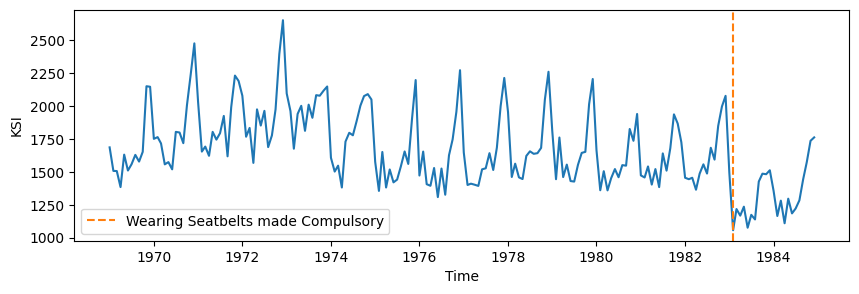

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(df["KSI"])

actual_cp = datetime.datetime(1983, 2, 1)
ax.axvline(
    actual_cp,
    color="tab:orange",
    linestyle="--",
    label="Wearing Seatbelts made Compulsory",
)
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("KSI")
fig.savefig("seatbelt_example.png")

* It was made compulsory to wear a seatbelt in the UK on January 31st 1983.
* It was made mandatory to install seatbelts in all new cars in 1968.

Use binary segmentation to find change points where there is a drop in 1000 KSI.

In [11]:
from sktime.detection.bs import BinarySegmentation

model = BinarySegmentation(threshold=1000)
predicted_change_points = model.fit_predict(df["KSI"])
print(predicted_change_points)

   ilocs
0     71
1    168


For change point detectors, `predict` returns a series containing the indexes of the change points.

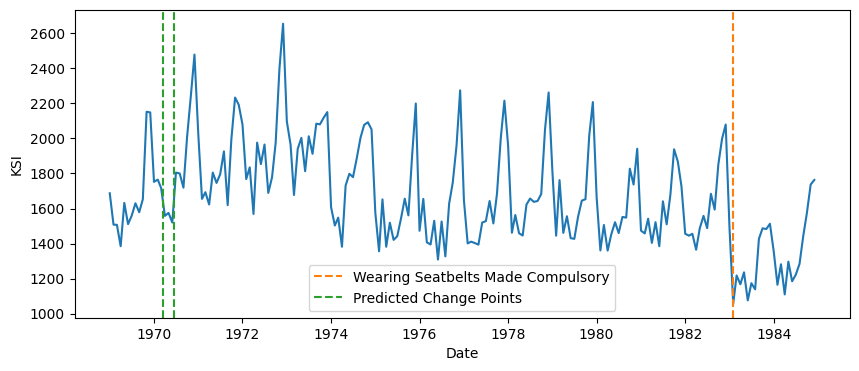

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df["KSI"])
ax.axvline(
    actual_cp,
    label="Wearing Seatbelts Made Compulsory",
    color="tab:orange",
    linestyle="--",
)

for i, cp in enumerate(predicted_change_points.values.flatten()):
    label = "Predicted Change Points" if i == 0 else None
    ax.axvline(cp, color="tab:green", linestyle="--", label=label)

ax.set_ylabel("KSI")
ax.set_xlabel("Date")
ax.legend()

The actual change point was identified almost exactly.